In [1]:
import pandas as pd
import numpy as np
import torch

In [2]:
data = pd.read_csv("data/preprocessed/Event_traces.csv")

In [3]:
# Drop 30% of 'Success' rows to reduce memory consumption
success_idx = (
    data.loc[data["Label"] == "Success"]
        .sample(frac=0.40, random_state=42)
        .index
)
data = data.drop(success_idx).reset_index(drop=True)

In [4]:
# convert string sequence to list sequence
data["Features"] = data["Features"].map(lambda x: x[1:-1].split(","))

# can map timeinterval with the operation ran
data["TimeInterval"] = data["TimeInterval"].map(lambda x: [float(i) for i in x[1:-1].split(",")])

In [5]:
data["Features"]

0         [E5, E22, E5, E5, E11, E11, E9, E9, E11, E9, E...
1         [E5, E5, E22, E5, E11, E9, E11, E9, E11, E9, E...
2         [E5, E22, E5, E5, E11, E9, E11, E9, E11, E9, E...
3         [E5, E5, E22, E5, E11, E9, E11, E9, E11, E9, E...
4         [E5, E5, E22, E5, E11, E9, E11, E9, E11, E9, E...
                                ...                        
351767    [E5, E11, E9, E5, E11, E9, E5, E11, E9, E26, E...
351768    [E5, E5, E5, E22, E11, E9, E11, E9, E11, E9, E...
351769    [E5, E22, E5, E5, E26, E11, E9, E11, E9, E11, ...
351770    [E5, E22, E5, E5, E11, E9, E26, E11, E9, E11, ...
351771    [E5, E5, E5, E22, E11, E9, E11, E9, E11, E9, E...
Name: Features, Length: 351772, dtype: object

In [6]:
# NOTE: One-Hot Encoding (Temporarily commented out to reduce memory consumption)
# Either we use one-hot encoding or text embedding to represent the log features/text

from sklearn.preprocessing import OneHotEncoder

# unique_features = data["Features"].map(lambda x: [i[1:] for i in x]).explode().unique().astype(np.int32)
# unique_features.sort()

# encoder = OneHotEncoder(sparse_output=False)
# encoded_features = encoder.fit(unique_features.reshape(-1, 1))

# data["Features_Encoded"] = data["Features"].map(lambda x: encoder.transform([[int(i[1:])] for i in x]))

In [7]:
# Text embedding using Sentence-BERT
from sentence_transformers import SentenceTransformer
template_data = pd.read_csv("data/preprocessed/HDFS.log_templates.csv")

model_name = 'all-MiniLM-L6-v2'
model = SentenceTransformer(model_name)

embeddings = model.encode(template_data['EventTemplate'].tolist())
template_embedding_dict = {template_id: template_embedding for template_id, template_embedding in zip(template_data["EventId"].tolist(), embeddings)}
data["Features_Embedded"] = data["Features"].map(lambda x: [template_embedding_dict[i] for i in x])

/Users/toanquach/.local/share/virtualenvs/anomaly_detection_project-zdiuRa5q/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
data["Features"][0], len(data["Features"][0])

(['E5',
  'E22',
  'E5',
  'E5',
  'E11',
  'E11',
  'E9',
  'E9',
  'E11',
  'E9',
  'E26',
  'E26',
  'E26',
  'E6',
  'E5',
  'E16',
  'E6',
  'E5',
  'E18',
  'E25',
  'E26',
  'E26',
  'E3',
  'E25',
  'E6',
  'E6',
  'E5',
  'E5',
  'E16',
  'E18',
  'E26',
  'E26',
  'E5',
  'E6',
  'E5',
  'E16',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E18',
  'E25',
  'E6',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E26',
  'E26',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E25',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
  'E3',
 

In [9]:
data["Features_Embedded"][0], len(data["Features_Embedded"][0]), len(data["Features_Embedded"][0][0])

([array([-9.69047695e-02,  9.48026478e-02, -4.03593406e-02, -5.34454510e-02,
          2.99836751e-02, -1.67766791e-02,  9.62885395e-02,  2.52506863e-02,
         -8.65088310e-04, -5.21881133e-02, -2.43652388e-02, -2.18958873e-02,
         -2.99940128e-02,  6.20531337e-03,  2.94665452e-02,  3.40765230e-02,
         -2.52064355e-02,  4.57830317e-02,  2.88620722e-02, -1.12024508e-02,
         -8.57576169e-03,  7.84568340e-02, -7.27074072e-02,  1.24844974e-02,
         -5.33424057e-02,  7.95609578e-02, -3.54656093e-02, -3.67647484e-02,
          2.28036381e-02, -5.42161912e-02,  9.60010216e-02, -2.14642175e-02,
          2.79535968e-02,  4.42429818e-02,  6.99885888e-03,  5.04190139e-02,
          2.15454604e-02, -6.71684444e-02, -2.80339960e-02, -4.27213088e-02,
          2.74506807e-02,  2.09972840e-02, -4.59320880e-02, -2.68992204e-02,
         -1.21591438e-04, -2.03105132e-03, -5.11726737e-02,  5.94743863e-02,
         -2.71559786e-02, -7.65230879e-02, -3.27367745e-02,  5.17798103e-02,

In [10]:
# clean data to reduce memory usage
data = data[["Features_Embedded", "TimeInterval", "Label"]]
del model
del embeddings
del template_data

In [11]:
data["Features_Embedded"]

0         [[-0.09690477, 0.09480265, -0.04035934, -0.053...
1         [[-0.09690477, 0.09480265, -0.04035934, -0.053...
2         [[-0.09690477, 0.09480265, -0.04035934, -0.053...
3         [[-0.09690477, 0.09480265, -0.04035934, -0.053...
4         [[-0.09690477, 0.09480265, -0.04035934, -0.053...
                                ...                        
351767    [[-0.09690477, 0.09480265, -0.04035934, -0.053...
351768    [[-0.09690477, 0.09480265, -0.04035934, -0.053...
351769    [[-0.09690477, 0.09480265, -0.04035934, -0.053...
351770    [[-0.09690477, 0.09480265, -0.04035934, -0.053...
351771    [[-0.09690477, 0.09480265, -0.04035934, -0.053...
Name: Features_Embedded, Length: 351772, dtype: object

In [12]:
# Maximum length of sequence is chosen as 50 based on the distribution of sequence lengths
# Sequences beyond this length are rare and has drippled effect on buiding even sequences
# (i.e., padding/truncating) for training. Most short or medium sequences from 1 -> 40 in
# length are padded up to 200s if this maximum length is not chosen.

MAX_LEN = 50 # maximum sequence length
EMBED_DIM = 384  # for 'all-MiniLM-L6-v2'

# pad with zeros on the left to create even sequences for training
def left_pad_feature(seq, pad_len=MAX_LEN, embed_dim=EMBED_DIM):
    seq = np.stack(seq)  # shape: (L, 384)
    L = seq.shape[0]
    if L >= pad_len:
        return seq[-pad_len:]  # truncate if too long
    pad = np.zeros((pad_len - L, embed_dim), dtype=seq.dtype)
    return np.vstack([pad, seq])

In [13]:
data["Features_Embedded_Padded"] = data["Features_Embedded"].map(left_pad_feature)

In [14]:
data = data[["Features_Embedded_Padded", "TimeInterval", "Label"]]

In [15]:
data["Features_Embedded_Padded"] = data["Features_Embedded_Padded"].map(lambda x: torch.from_numpy(x))

In [16]:
data["Label"]

0         Success
1         Success
2            Fail
3         Success
4         Success
           ...   
351767    Success
351768    Success
351769    Success
351770    Success
351771       Fail
Name: Label, Length: 351772, dtype: object

In [17]:
label_encoder = OneHotEncoder(sparse_output=False)
encoded_labels = label_encoder.fit_transform(data["Label"].values.reshape(-1, 1))

In [18]:
encoded_labels

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], shape=(351772, 2))

In [19]:
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split

In [20]:
# Prepare features and labels
X = torch.stack(data["Features_Embedded_Padded"].tolist())  # shape: (N, seq_len, 384)
y = torch.from_numpy(encoded_labels)       # shape: (N, num_classes)

In [21]:
del data

In [22]:
torch.save({"X": X, "y": y}, "processed_event_and_label_tensors.pt")

In [23]:
# Train/test split (80/20)
N = len(X)
train_size = int(0.8 * N)
test_size = N - train_size
dataset = torch.utils.data.TensorDataset(X, y)
train_dataset, test_dataset = random_split(dataset, [train_size, test_size], generator=torch.Generator().manual_seed(42))

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

In [24]:
# LSTM Model
class LSTMClassifier(nn.Module):
    def __init__(self, input_dim=384, hidden_dim=128, num_layers=1, num_classes=None):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, num_classes)
        
    def forward(self, x):
        _, (hn, _) = self.lstm(x)  # hn: (num_layers, batch, hidden_dim)
        out = self.fc(hn[-1])      # use last layer's hidden state
        return out


In [25]:
num_classes = y.shape[1]
model = LSTMClassifier(input_dim=384, hidden_dim=128, num_layers=1, num_classes=num_classes)

# Loss and optimizer
criterion = nn.BCEWithLogitsLoss() if num_classes > 1 else nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [26]:
# Training loop (1 epoch for demonstration)
for epoch in range(1):
    model.train()
    for xb, yb in train_loader:
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1} loss: {loss.item():.4f}")


Epoch 1 loss: 0.0002


In [27]:
from sklearn.metrics import classification_report

all_preds = []
all_targets = []

model.eval()
with torch.no_grad():
    for xb, yb in test_loader:
        logits = model(xb)
        
        if num_classes > 1:
            # Multi-class/One-hot: use argmax to get class index (0, 1, etc.)
            preds = torch.argmax(logits, dim=1)
            targets = torch.argmax(yb, dim=1)
        else:
            # Binary (single output neuron): threshold at 0
            preds = (logits > 0).float().view(-1)
            targets = yb.view(-1)
            
        all_preds.extend(preds.cpu().numpy())
        all_targets.extend(targets.cpu().numpy())

# Get readable class names from the label encoder
class_names = [str(c) for c in label_encoder.categories_[0]]

print("Classification Report:")
print(classification_report(all_targets, all_preds, target_names=class_names, digits=4))

Classification Report:
              precision    recall  f1-score   support

        Fail     0.9859    0.9626    0.9741      3419
     Success     0.9981    0.9993    0.9987     66936

    accuracy                         0.9975     70355
   macro avg     0.9920    0.9809    0.9864     70355
weighted avg     0.9975    0.9975    0.9975     70355



Classification Report:
              precision    recall  f1-score   support

        Fail     0.9859    0.9626    0.9741      3419
     Success     0.9981    0.9993    0.9987     66936

    accuracy                         0.9975     70355
   macro avg     0.9920    0.9809    0.9864     70355
weighted avg     0.9975    0.9975    0.9975     70355



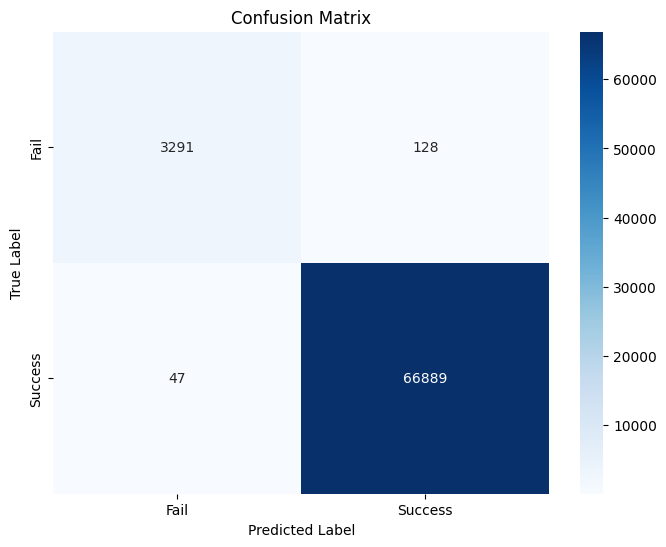

In [28]:
print("Classification Report:")
print(classification_report(all_targets, all_preds, target_names=class_names, digits=4))

# --- Visual Evaluation: Confusion Matrix ---
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(all_targets, all_preds)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
